## Imports

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

from sklearn.preprocessing import OneHotEncoder, StandardScaler


## Data

In [3]:
train_path = 'data/House-Price-Prediction/train.csv'
test_path = 'data/House-Price-Prediction/test.csv'

target = 'SalePrice'

In [4]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

## DEA

In [5]:
num_rows_test = test_df.shape[0]
num_rows_train = train_df.shape[0]

print(f"Number of rows: {num_rows_train} train, {num_rows_test} test")

Number of rows: 1022 train, 438 test


In [6]:
train_df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,135,136,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,174000
1,1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
2,762,763,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,Con,Normal,215200
3,932,933,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,320000
4,435,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000


In [7]:
test_df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1,1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
2,413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
3,522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
4,1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500


In [8]:
train_df.describe()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1022.000000,1022.000000,1022.000000,832.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1019.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,731.338552,732.338552,57.059687,70.375000,10745.437378,6.128180,5.564579,1970.995108,1984.757339,105.261040,...,97.548924,49.525440,21.303327,3.881605,15.565558,2.743640,41.565558,6.363992,2007.814090,181312.692759
std,425.860402,425.860402,42.669715,25.533607,11329.753423,1.371391,1.110557,30.748816,20.747109,172.707705,...,131.691873,69.205968,61.534380,32.547722,56.445749,39.671531,338.132358,2.650115,1.325807,77617.461005
min,0.000000,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,366.500000,367.500000,20.000000,59.000000,7564.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,734.500000,735.500000,50.000000,70.000000,9600.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,1099.500000,1100.500000,70.000000,80.000000,11692.500000,7.000000,6.000000,2001.000000,2004.000000,170.000000,...,170.500000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1459.000000,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000,745000.000000


In [9]:
test_df.describe()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,438.000000,438.000000,438.000000,369.000000,438.000000,438.000000,438.000000,438.000000,438.000000,433.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,725.210046,726.210046,56.518265,69.317073,9983.406393,6.031963,5.600457,1971.904110,1985.118721,99.976905,...,86.534247,39.974886,23.472603,2.308219,13.883562,2.794521,47.977169,6.223744,2007.819635,180007.703196
std,411.970341,411.970341,41.472203,21.215119,5683.659328,1.408988,1.118883,28.913347,20.427459,199.522890,...,108.836924,58.329074,60.181441,19.819517,54.162461,41.379516,744.727192,2.825219,1.334930,83630.508422
min,10.000000,11.000000,20.000000,21.000000,1491.000000,2.000000,2.000000,1875.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,363.500000,364.500000,20.000000,59.000000,7500.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,709.000000,710.000000,50.000000,68.000000,9157.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,155950.000000
75%,1083.250000,1084.250000,70.000000,80.000000,11398.500000,7.000000,6.000000,1999.750000,2004.000000,148.000000,...,165.750000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,207500.000000
max,1454.000000,1455.000000,190.000000,174.000000,70761.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,...,517.000000,502.000000,318.000000,238.000000,396.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1022 non-null   int64  
 1   Id             1022 non-null   int64  
 2   MSSubClass     1022 non-null   int64  
 3   MSZoning       1022 non-null   object 
 4   LotFrontage    832 non-null    float64
 5   LotArea        1022 non-null   int64  
 6   Street         1022 non-null   object 
 7   Alley          66 non-null     object 
 8   LotShape       1022 non-null   object 
 9   LandContour    1022 non-null   object 
 10  Utilities      1022 non-null   object 
 11  LotConfig      1022 non-null   object 
 12  LandSlope      1022 non-null   object 
 13  Neighborhood   1022 non-null   object 
 14  Condition1     1022 non-null   object 
 15  Condition2     1022 non-null   object 
 16  BldgType       1022 non-null   object 
 17  HouseStyle     1022 non-null   object 
 18  OverallQ

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     438 non-null    int64  
 1   Id             438 non-null    int64  
 2   MSSubClass     438 non-null    int64  
 3   MSZoning       438 non-null    object 
 4   LotFrontage    369 non-null    float64
 5   LotArea        438 non-null    int64  
 6   Street         438 non-null    object 
 7   Alley          25 non-null     object 
 8   LotShape       438 non-null    object 
 9   LandContour    438 non-null    object 
 10  Utilities      438 non-null    object 
 11  LotConfig      438 non-null    object 
 12  LandSlope      438 non-null    object 
 13  Neighborhood   438 non-null    object 
 14  Condition1     438 non-null    object 
 15  Condition2     438 non-null    object 
 16  BldgType       438 non-null    object 
 17  HouseStyle     438 non-null    object 
 18  OverallQua

## A - Common Ways to Handle Missing Data with Their Pros and Cons

### 1. **Removing Missing Values (Deletion)**
   - **Method:** Drop rows (`df.dropna()`) or columns (`df.dropna(axis=1)`) containing missing values.
   - **Pros:**
     - Simple and easy to implement.
     - Maintains data integrity without introducing bias.
   - **Cons:**
     - Loss of valuable data, especially if missing values are common.
     - Can significantly reduce dataset size, leading to biased or unreliable models.

### 2. **Mean/Median/Mode Imputation**
   - **Method:** Replace missing values with the mean (for numerical data), median (for skewed numerical data), or mode (for categorical data).
   - **Pros:**
     - Preserves dataset size.
     - Simple and computationally efficient.
   - **Cons:**
     - Can distort data distribution and reduce variability.
     - May introduce bias, especially if missing values are not random.

### 3. **Forward Fill / Backward Fill (Time-Series or Sequential Data)**
   - **Method:** Use previous (forward fill: `df.fillna(method='ffill')`) or next (backward fill: `df.fillna(method='bfill')`) values to fill missing entries.
   - **Pros:**
     - Suitable for time-series or ordered data.
     - Maintains trend continuity.
   - **Cons:**
     - Not effective for non-sequential data.
     - Can propagate incorrect values if missingness is systematic.

### 4. **Predictive Imputation (Machine Learning Methods)**
   - **Method:** Use models like KNN, regression, or deep learning to predict missing values based on other available features.
   - **Pros:**
     - More accurate imputation compared to simple statistical methods.
     - Maintains data relationships and variability.
   - **Cons:**
     - Computationally expensive.
     - Requires a well-trained model, which may introduce bias if the training data is not representative.

## B - Handling Missing Data

In [13]:
def calculate_missing_percentages_for_features(df):
    return pd.DataFrame({
        'Feature': df.columns,
        'Num of Missing Values': df.isnull().sum(),
        'Missing Percentage': (df.isnull().sum() / len(df)) * 100,
        'Feature Type': df.dtypes,
    }).sort_values(by='Missing Percentage', ascending=False)

In [14]:
df = pd.concat([train_df, test_df])
missing_percentages = calculate_missing_percentages_for_features(df)

In [15]:
missing_percentages

,Feature,Num of Missing Values,Missing Percentage,Feature Type
PoolQC,PoolQC,1453,99.520548,object
MiscFeature,MiscFeature,1406,96.301370,object
Alley,Alley,1369,93.767123,object
Fence,Fence,1179,80.753425,object
MasVnrType,MasVnrType,872,59.726027,object
...,...,...,...,...
Heating,Heating,0,0.000000,object
HeatingQC,HeatingQC,0,0.000000,object
MSZoning,MSZoning,0,0.000000,object
1stFlrSF,1stFlrSF,0,0.000000,int64


In [16]:
missing_percentages[
    (missing_percentages["Feature Type"] == "object") & 
    (missing_percentages["Num of Missing Values"] > 0)
]

,Feature,Num of Missing Values,Missing Percentage,Feature Type
PoolQC,PoolQC,1453,99.520548,object
MiscFeature,MiscFeature,1406,96.301370,object
Alley,Alley,1369,93.767123,object
Fence,Fence,1179,80.753425,object
MasVnrType,MasVnrType,872,59.726027,object
FireplaceQu,FireplaceQu,690,47.260274,object
GarageCond,GarageCond,81,5.547945,object
GarageType,GarageType,81,5.547945,object
GarageFinish,GarageFinish,81,5.547945,object
GarageQual,GarageQual,81,5.547945,object


In [17]:
missing_percentages[
    (missing_percentages["Feature Type"] != "object") & 
    (missing_percentages["Num of Missing Values"] > 0)
]

,Feature,Num of Missing Values,Missing Percentage,Feature Type
LotFrontage,LotFrontage,259,17.739726,float64
GarageYrBlt,GarageYrBlt,81,5.547945,float64
MasVnrArea,MasVnrArea,8,0.547945,float64


### Method 1: Removing Missing Columns

In [18]:
train_df_features_removed = train_df.copy()
test_df_features_removed = test_df.copy()

We drop the categorical features with a missing percentages higher than 47%.

In [19]:
features_to_drop = missing_percentages[missing_percentages["Missing Percentage"] > 47]["Feature"].tolist()
features_to_drop

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']

In [20]:
train_df_features_removed.drop(columns=features_to_drop, inplace=True)
test_df_features_removed.drop(columns=features_to_drop, inplace=True)

In [21]:
missing_percentages1 = calculate_missing_percentages_for_features(pd.concat([train_df_features_removed, test_df_features_removed]))

missing_percentages1 = missing_percentages1[
    (missing_percentages1["Feature Type"] == "object") & 
    (missing_percentages1["Num of Missing Values"] > 0)
]

missing_percentages1

,Feature,Num of Missing Values,Missing Percentage,Feature Type
GarageCond,GarageCond,81,5.547945,object
GarageType,GarageType,81,5.547945,object
GarageFinish,GarageFinish,81,5.547945,object
GarageQual,GarageQual,81,5.547945,object
BsmtFinType2,BsmtFinType2,38,2.602740,object
BsmtExposure,BsmtExposure,38,2.602740,object
BsmtQual,BsmtQual,37,2.534247,object
BsmtFinType1,BsmtFinType1,37,2.534247,object
BsmtCond,BsmtCond,37,2.534247,object
Electrical,Electrical,1,0.068493,object


### Method 2: Filling Missing Columns with Mode

In [22]:
train_df_features_removed_and_filled = train_df_features_removed.copy()
test_df_features_removed_and_filled = test_df_features_removed.copy()

In [23]:
features_to_fill = missing_percentages1["Feature"].tolist()
features_to_fill

['GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'BsmtCond',
 'Electrical']

In [24]:
for col in features_to_fill:
    mode_value_train = train_df_features_removed_and_filled[col].mode()[0]
    train_df_features_removed_and_filled[col].fillna(mode_value_train, inplace=True)

    mode_value_test = test_df_features_removed_and_filled[col].mode()[0]
    test_df_features_removed_and_filled[col].fillna(mode_value_test, inplace=True)

C:\Users\mjid\AppData\Local\Temp\ipykernel_15224\2042393772.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_features_removed_and_filled[col].fillna(mode_value_train, inplace=True)
C:\Users\mjid\AppData\Local\Temp\ipykernel_15224\2042393772.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [25]:
missing_percentages2 = calculate_missing_percentages_for_features(pd.concat([train_df_features_removed_and_filled, test_df_features_removed_and_filled]))

missing_percentages2 = missing_percentages2[missing_percentages2["Num of Missing Values"] > 0]

missing_percentages2

,Feature,Num of Missing Values,Missing Percentage,Feature Type
LotFrontage,LotFrontage,259,17.739726,float64
GarageYrBlt,GarageYrBlt,81,5.547945,float64
MasVnrArea,MasVnrArea,8,0.547945,float64


### Method 3: Filling Missing Columns with Median

In [26]:
train_df_features_removed_and_filled_2 = train_df_features_removed_and_filled.copy()
test_df_features_removed_and_filled_2 = test_df_features_removed_and_filled.copy()

In [27]:
numercial_features_to_fill = missing_percentages2["Feature"].tolist()
numercial_features_to_fill

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [28]:
for col in numercial_features_to_fill:
    median_value_train = train_df_features_removed_and_filled_2[col].median()
    train_df_features_removed_and_filled_2[col].fillna(median_value_train, inplace=True)

    median_value_test = test_df_features_removed_and_filled_2[col].median()
    test_df_features_removed_and_filled_2[col].fillna(median_value_test, inplace=True)

C:\Users\mjid\AppData\Local\Temp\ipykernel_15224\363729369.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_features_removed_and_filled_2[col].fillna(median_value_train, inplace=True)
C:\Users\mjid\AppData\Local\Temp\ipykernel_15224\363729369.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [29]:
missing_percentages3 = calculate_missing_percentages_for_features(pd.concat([train_df_features_removed_and_filled_2, test_df_features_removed_and_filled_2]))

missing_percentages3

,Feature,Num of Missing Values,Missing Percentage,Feature Type
MSSubClass,MSSubClass,0,0.0,int64
GarageYrBlt,GarageYrBlt,0,0.0,float64
Fireplaces,Fireplaces,0,0.0,int64
Functional,Functional,0,0.0,object
TotRmsAbvGrd,TotRmsAbvGrd,0,0.0,int64
...,...,...,...,...
ExterQual,ExterQual,0,0.0,object
MasVnrArea,MasVnrArea,0,0.0,float64
Exterior2nd,Exterior2nd,0,0.0,object
Exterior1st,Exterior1st,0,0.0,object


## C - Feature Selection

In [30]:
corr_matrix = train_df_features_removed_and_filled_2.corr(numeric_only=True)

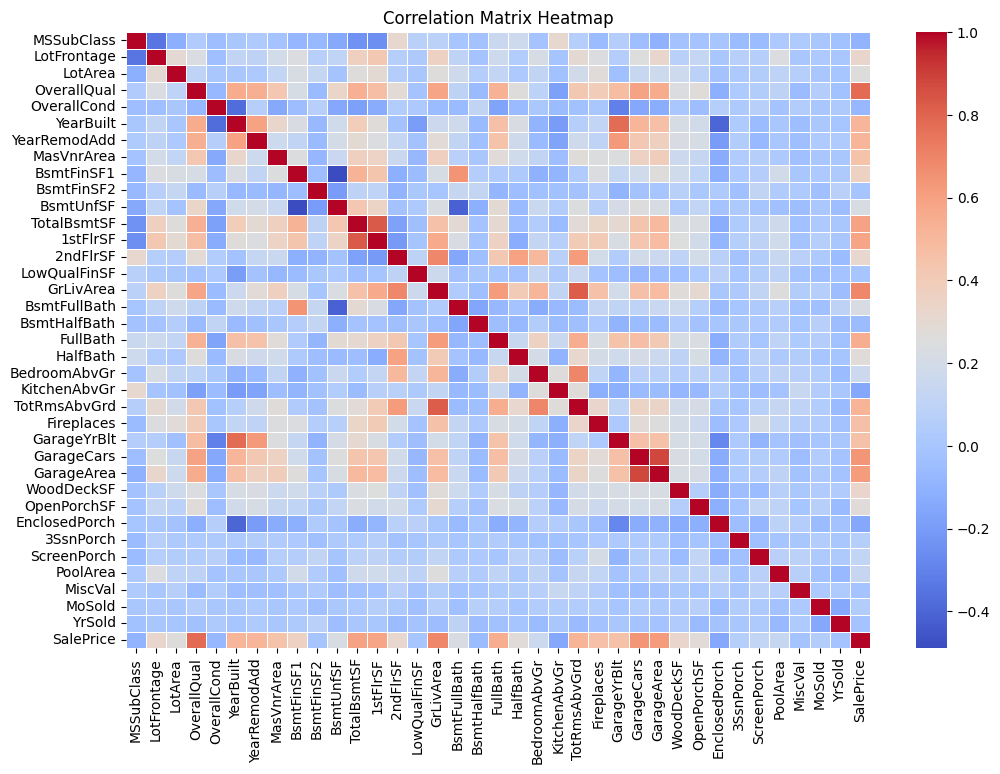

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [32]:
corr_with_target = corr_matrix[target].sort_values(ascending=False)
corr_with_target

SalePrice        1.000000
OverallQual      0.784720
GrLivArea        0.689238
GarageCars       0.642689
GarageArea       0.621937
TotalBsmtSF      0.590017
1stFlrSF         0.583132
FullBath         0.549164
TotRmsAbvGrd     0.519634
YearBuilt        0.512206
YearRemodAdd     0.512190
Fireplaces       0.461329
GarageYrBlt      0.454388
MasVnrArea       0.453250
BsmtFinSF1       0.360559
WoodDeckSF       0.331151
LotFrontage      0.320425
2ndFlrSF         0.314904
HalfBath         0.278889
OpenPorchSF      0.277547
LotArea          0.262896
BsmtFullBath     0.228331
BsmtUnfSF        0.223321
BedroomAbvGr     0.159879
PoolArea         0.138324
ScreenPorch      0.119974
3SsnPorch        0.059417
MoSold           0.048494
LowQualFinSF    -0.002201
BsmtFinSF2      -0.009665
YrSold          -0.012761
MiscVal         -0.016525
BsmtHalfBath    -0.052806
OverallCond     -0.071461
MSSubClass      -0.094099
KitchenAbvGr    -0.146972
EnclosedPorch   -0.147502
Name: SalePrice, dtype: float64

The features with negative correlation misguide the model, and the ones with low correlation might not be useful and seem logical to drop. In this way, we can simplify the model and improve its performance by capturing its attention to more correlated features. Here we consider a treshold of 50% and use it for drop less relevant features.

Note that we made this decision by looking at the training data.

In [41]:
train_df_features_removed_and_filled_and_selected = train_df_features_removed_and_filled_2.copy()
test_df_features_removed_and_filled_and_selected = test_df_features_removed_and_filled_2.copy()

In [44]:
less_relevant_features = corr_with_target[abs(corr_with_target) < 0.5].index.tolist()
less_relevant_features

['Fireplaces',
 'GarageYrBlt',
 'MasVnrArea',
 'BsmtFinSF1',
 'WoodDeckSF',
 'LotFrontage',
 '2ndFlrSF',
 'HalfBath',
 'OpenPorchSF',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'PoolArea',
 'ScreenPorch',
 '3SsnPorch',
 'MoSold',
 'LowQualFinSF',
 'BsmtFinSF2',
 'YrSold',
 'MiscVal',
 'BsmtHalfBath',
 'OverallCond',
 'MSSubClass',
 'KitchenAbvGr',
 'EnclosedPorch']

In [45]:
train_df_features_removed_and_filled_and_selected.drop(columns=less_relevant_features, inplace=True)
test_df_features_removed_and_filled_and_selected.drop(columns=less_relevant_features, inplace=True)

In [46]:
train_df_features_removed_and_filled_and_selected

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Attchd,Unf,2,530,TA,TA,Y,WD,Normal,174000
1,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,Basment,Fin,2,525,TA,TA,Y,WD,Normal,145000
2,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Attchd,Unf,2,614,TA,TA,Y,Con,Normal,215200
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Somerst,RRNn,Norm,...,Attchd,Fin,3,788,TA,TA,Y,WD,Normal,320000
4,RL,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,PosN,Norm,...,Attchd,RFn,2,550,TA,TA,Y,ConLw,Normal,212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,440,TA,TA,Y,WD,Normal,176432
1018,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,...,Detchd,Unf,2,576,TA,TA,Y,WD,Normal,135000
1019,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,Detchd,Unf,2,572,TA,TA,N,WD,Normal,115000
1020,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,1,216,TA,TA,Y,WD,Normal,189950


In [84]:
test_df_features_removed_and_filled_and_selected

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,Attchd,RFn,1,264,TA,TA,Y,WD,Normal,154500
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,2,712,TA,TA,Y,WD,Normal,325000
2,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,Detchd,Unf,2,360,TA,TA,Y,WD,Normal,115000
3,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,...,Detchd,Unf,2,420,TA,TA,Y,WD,Normal,159000
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,...,Attchd,Fin,3,912,TA,TA,Y,WD,Normal,315500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,RFn,1,308,TA,TA,Y,WD,Normal,139000
434,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,...,Attchd,Unf,1,220,Fa,TA,Y,WD,Normal,126175
435,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Attchd,RFn,2,562,TA,TA,Y,WD,Normal,205950
436,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,...,Detchd,Unf,2,528,TA,TA,Y,ConLI,Normal,110000


## D - One-Hot Encoding and Normalization

In [99]:
train_df_preprocessed = train_df_features_removed_and_filled_and_selected.copy()
test_df_preprocessed = test_df_features_removed_and_filled_and_selected.copy()

### Standardization (Normalization)

In [100]:
categorical_cols = train_df_preprocessed.select_dtypes(include=['object']).columns.tolist()

numerical_cols = train_df_preprocessed.select_dtypes(exclude=['object']).columns.tolist()
numerical_cols.remove(target)

In [101]:
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [102]:
train_df_preprocessed[numerical_cols] = scaler.fit_transform(train_df_preprocessed[numerical_cols])
test_df_preprocessed[numerical_cols] = scaler.transform(test_df_preprocessed[numerical_cols])

In [103]:
train_df_preprocessed

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Attchd,Unf,0.296063,0.253813,TA,TA,Y,WD,Normal,174000
1,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,Basment,Fin,0.296063,0.229814,TA,TA,Y,WD,Normal,145000
2,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Attchd,Unf,0.296063,0.656997,TA,TA,Y,Con,Normal,215200
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Somerst,RRNn,Norm,...,Attchd,Fin,1.665189,1.492165,TA,TA,Y,WD,Normal,320000
4,RL,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,PosN,Norm,...,Attchd,RFn,0.296063,0.349809,TA,TA,Y,ConLw,Normal,212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,0.296063,-0.178171,TA,TA,Y,WD,Normal,176432
1018,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,...,Detchd,Unf,0.296063,0.474604,TA,TA,Y,WD,Normal,135000
1019,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,Detchd,Unf,0.296063,0.455405,TA,TA,N,WD,Normal,115000
1020,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,-1.073062,-1.253330,TA,TA,Y,WD,Normal,189950


In [104]:
test_df_preprocessed

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,Attchd,RFn,-1.073062,-1.022939,TA,TA,Y,WD,Normal,154500
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,0.296063,1.127379,TA,TA,Y,WD,Normal,325000
2,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,Detchd,Unf,0.296063,-0.562156,TA,TA,Y,WD,Normal,115000
3,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,...,Detchd,Unf,0.296063,-0.274167,TA,TA,Y,WD,Normal,159000
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,...,Attchd,Fin,1.665189,2.087343,TA,TA,Y,WD,Normal,315500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,RFn,-1.073062,-0.811747,TA,TA,Y,WD,Normal,139000
434,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,...,Attchd,Unf,-1.073062,-1.234131,Fa,TA,Y,WD,Normal,126175
435,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Attchd,RFn,0.296063,0.407407,TA,TA,Y,WD,Normal,205950
436,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,...,Detchd,Unf,0.296063,0.244213,TA,TA,Y,ConLI,Normal,110000


### One-Hot Encoding

In [105]:
train_encoded = encoder.fit_transform(train_df_preprocessed[categorical_cols])
test_encoded = encoder.transform(test_df_preprocessed[categorical_cols])

In [106]:
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

train_encoded_df.index = train_df_preprocessed.index
test_encoded_df.index = test_df_preprocessed.index

In [107]:
train_df_preprocessed = train_df_preprocessed.drop(columns=categorical_cols).join(train_encoded_df)
test_df_preprocessed = test_df_preprocessed.drop(columns=categorical_cols).join(test_encoded_df)

In [108]:
train_df_preprocessed

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.636031,-0.032378,-0.711644,0.546130,1.315652,0.287835,0.767840,0.279234,0.296063,0.253813,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.823057,1.106434,0.976164,-1.146608,-0.251022,-0.861565,-1.069941,-0.948194,0.296063,0.229814,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.636031,1.236584,1.169056,-0.679260,-1.042064,0.033459,0.767840,0.279234,0.296063,0.656997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.095118,1.138972,1.024387,1.890034,1.888387,0.708025,0.767840,0.892948,1.665189,1.492165,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.636031,0.813597,0.542156,-0.583107,-0.880260,0.248265,0.767840,-0.334480,0.296063,0.349809,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,-0.093513,1.138972,1.024387,0.568491,0.370511,-0.405573,0.767840,-0.334480,0.296063,-0.178171,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1018,-1.552600,-1.398953,-1.676106,0.139158,0.406468,0.851229,0.767840,0.279234,0.296063,0.474604,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1019,-0.823057,-0.520441,0.252817,-0.437760,-0.785232,-1.253491,-1.069941,-0.948194,0.296063,0.455405,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1020,0.636031,-1.724328,0.638602,-0.330426,-0.661953,-0.194536,-1.069941,0.279234,-1.073062,-1.253330,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [109]:
test_df_preprocessed

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.093513,-0.260141,0.879717,-0.001718,-0.261295,-0.869102,-1.069941,-0.334480,-1.073062,-1.022939,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.365574,0.748522,0.493933,0.901672,0.848218,2.059040,0.767840,1.506662,0.296063,1.127379,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.823057,-1.431491,-1.676106,-0.115759,-0.364028,-0.944472,-1.069941,-0.948194,0.296063,-0.562156,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.093513,-0.780741,-1.676106,-0.124704,-0.425667,0.253918,0.767840,0.279234,0.296063,-0.274167,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.095118,1.171509,1.120833,1.252742,1.156417,0.171011,0.767840,-0.334480,1.665189,2.087343,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,-0.823057,-0.422828,0.349263,-0.008426,-0.292115,-0.891713,-1.069941,-0.334480,-1.073062,-0.811747,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
434,-2.282144,-0.520441,0.976164,0.228602,-0.017305,-0.690097,-1.069941,-0.334480,-1.073062,-1.234131,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
435,0.636031,1.171509,1.072610,-0.551801,-0.893101,0.255802,0.767840,0.279234,0.296063,0.407407,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
436,-0.093513,-1.659253,0.735048,-0.840260,-1.247529,-0.627916,-1.069941,0.279234,0.296063,0.244213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## E - MLP From Scratch and Training

In [111]:
X_train = torch.tensor(train_df_preprocessed.drop(columns=target).values, dtype=torch.float32)
y_train = torch.tensor(train_df_preprocessed[target].values, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(test_df_preprocessed.drop(columns=target).values, dtype=torch.float32)
y_test = torch.tensor(test_df_preprocessed[target].values, dtype=torch.float32).view(-1, 1)

In [112]:
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

In [113]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # Output layer (regression task)
        )

    def forward(self, x):
        return self.model(x)

input_size = X_train.shape[1]
model = MLP(input_size)

In [114]:
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [115]:
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch + 1) % 10 == 0:  # Print loss every 10 epochs
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

Epoch [10/100], Loss: 2870633698.0000
Epoch [20/100], Loss: 1544502276.0000
Epoch [30/100], Loss: 1293343096.0000
Epoch [40/100], Loss: 1145815483.0000
Epoch [50/100], Loss: 1046056848.0000
Epoch [60/100], Loss: 976749257.5000
Epoch [70/100], Loss: 925154256.0000
Epoch [80/100], Loss: 897985366.0000
Epoch [90/100], Loss: 852635111.0000
Epoch [100/100], Loss: 822461479.0000


## F - Testing Model

In [116]:
def rmse(y_true, y_pred):
    return torch.sqrt(F.mse_loss(y_pred, y_true))

def mae(y_true, y_pred):
    return F.l1_loss(y_pred, y_true)

def mape(y_true, y_pred):
    return torch.mean(torch.abs((y_true - y_pred) / y_true)) * 100

def log_rmse(y_true, y_pred):
    return torch.sqrt(F.mse_loss(torch.log1p(y_pred), torch.log1p(y_true)))  # log1p(x) = log(x+1) for stability

In [117]:
def evaluate(model, data_loader):
    model.eval()
    total_rmse, total_mae, total_mape, total_log_rmse = 0, 0, 0, 0
    count = 0

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            y_pred = model(X_batch)

            total_rmse += rmse(y_batch, y_pred).item()
            total_mae += mae(y_batch, y_pred).item()
            total_mape += mape(y_batch, y_pred).item()
            total_log_rmse += log_rmse(y_batch, y_pred).item()
            count += 1

    return {
        "RMSE": total_rmse / count,
        "MAE": total_mae / count,
        "MAPE": total_mape / count,
        "Log RMSE": total_log_rmse / count
    }

# Evaluate on Train & Test Data
train_metrics = evaluate(model, train_loader)
test_metrics = evaluate(model, test_loader)

print("Train Metrics:", train_metrics)
print("Test Metrics:", test_metrics)

Train Metrics: {'RMSE': 25476.357543945312, 'MAE': 16462.704498291016, 'MAPE': 9.49158127605915, 'Log RMSE': 0.12918702326714993}
Test Metrics: {'RMSE': 28260.671805245536, 'MAE': 19247.23221261161, 'MAPE': 11.591198342187065, 'Log RMSE': 0.16084393060633115}
